In [12]:
import pandas as pd
import math
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from MEBF import MEBF, matrix_subtract, matrix_product
import seaborn as sns
import time
import scipy
%matplotlib inline

In [5]:
data = pd.read_csv("gene.csv",index_col = 0)

Text(0, 0.5, 'explained variance ratio(%)')

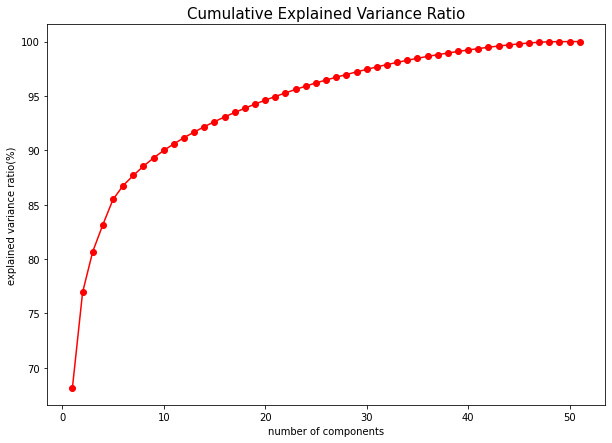

In [4]:
from sklearn.preprocessing import scale
data_norm = scale(data)

pca = PCA(n_components = 'mle')
pca.fit(data_norm)
evr = pca.explained_variance_ratio_ * 100

# 查看累计解释方差比率与主成分个数的关系
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), "-ro")
ax.set_title("Cumulative Explained Variance Ratio", fontsize=15)
ax.set_xlabel("number of components")
ax.set_ylabel("explained variance ratio(%)")

Text(0, 0.5, 'explained variance ratio(%)')

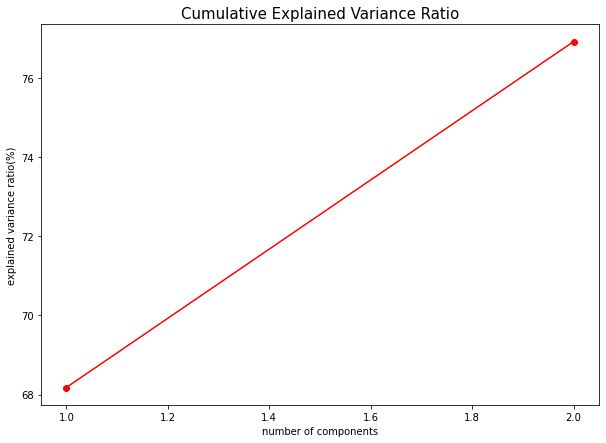

In [5]:
# Only project by pc1 and pc2
from sklearn.preprocessing import scale
data_norm = scale(data)

pca = PCA(n_components = 2)
pca.fit(data_norm)
evr = pca.explained_variance_ratio_ * 100

# 查看累计解释方差比率与主成分个数的关系
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), "-ro")
ax.set_title("Cumulative Explained Variance Ratio", fontsize=15)
ax.set_xlabel("number of components")
ax.set_ylabel("explained variance ratio(%)")

In [6]:
pca_df = pca.transform(data_norm)
pca_df.shape

(23684, 2)

In [7]:
u = pca.components_.reshape([52,2])
z = u.T.dot(data_norm.T)
df_approx = u.dot(z).reshape(data.shape)

In [8]:
data_res = pd.DataFrame(data=(data_norm-df_approx),index = data.index, columns = data.columns)

In [9]:
data_res.head(3)

,CY58_1_CD45_F08_S1028_comb,CY58_1_CD45_A05_S965_comb,CY58_1_CD45_D01_S997_comb,cy80.Cd45.pos.Pd1.neg.S293.E05.S293.comb,cy82.CD45.pos.3.A07.S7.comb,cy82.CD45.pos.3.B08.S20.comb,cy53.1.CD45.pos.2.A04.S964.comb,cy53.1.CD45.pos.1.D01.S37.comb,cy53.1.CD45.pos.2.B08.S980.comb,cy53.1.CD45.pos.1.F04.S64.comb,...,cy60_1_cd_45_pos_3_C04_S316_comb,CY89FNA_A03_S195_comb,CY88CD45POS_2_F07_S451_comb,CY88CD45_150813_D05_S329_comb,CY88CD45POS_2_G06_S462_comb,CY94CD45POS_1_E04_S148_comb,CY88CD45POS_2_F09_S453_comb,CY84_PRIM_POS_All_7_E07_S247_comb,CY84_PRIM_POS_All_7_B06_S210_comb,CY84_PRIM_POS_All_8_E10_S154_comb
C9orf152,-0.046124,-3.545455,-0.062904,0.006041,-0.010713,-0.009014,-0.043557,-0.075699,-0.017701,-0.044791,...,-0.100306,-0.008015,-0.029219,-0.162966,-0.033382,0.008594,-0.022169,-0.000458,0.015679,0.007504
RPS11,9.229329,8.760094,2.113379,2.894422,0.841377,5.114128,7.937011,4.039091,17.063287,7.272768,...,4.690430,2.870081,7.721619,7.468801,10.606953,7.092032,3.268144,-0.087569,1.324649,3.287528
ELMO2,1.229986,-0.047597,-0.042117,-0.079039,0.003833,0.149355,-0.027639,-0.025661,0.089242,-0.022666,...,-0.060442,-0.007436,1.495882,0.004034,-0.033106,-0.000725,-0.053493,0.000876,1.008937,0.007504


<AxesSubplot:>

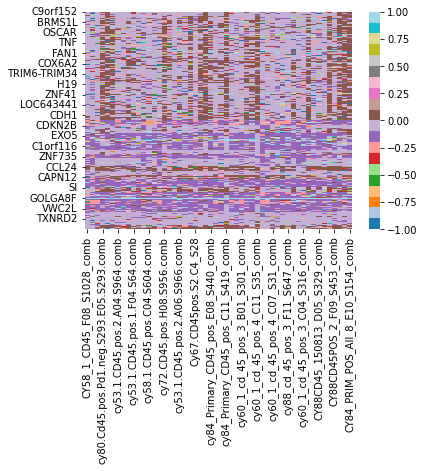

In [64]:
sns.heatmap(data_res, annot=False, vmin=-1, vmax=1, cmap="tab20")

In [11]:
x_in_paper = pd.DataFrame(np.array([[1,1,0,1,1,1,0,1,0,0,0],[1,1,1,1,1,1,1,1,1,1,1],[1,1,0,1,1,1,1,0,1,0,1],
         [0,1,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0,1,0,0],
         [0,0,0,1,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1,0],[1,1,0,1,0,1,1,0,0,0,0],
         [1,1,1,1,1,0,0,0,0,0,0,],[1,1,0,1,1,0,0,0,0,0,0]]), index = range(1,12), columns = range(1,12))
A,B = MEBF(x_in_paper,0.8)

<AxesSubplot:>

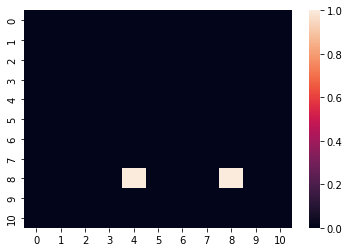

In [12]:
sns.heatmap(matrix_subtract(x_in_paper.values, matrix_product(A.values, B.values)), annot=False, vmin=0, vmax=1)

# Now focus on BCV, to see what it could bring to us

In [17]:
times = 11
num_comps = 25
x = pd.DataFrame(scale(data),index = data.index, columns = data.columns)
error = pd.DataFrame(index = range(1,times), columns = range(1,num_comps))
# iterate over number of components
for num in range(1,num_comps):
    for time in range(1,times):
        # shuffle x
        x = x[np.random.permutation(x.columns)]
        x = x.reindex(np.random.permutation(x.index))
        # Since it is (23684,52), submatrix size is chosen as (100,5)
        # leave out submatrix
        A = x.values[:20,:5]
        B = x.values[:20,5:]
        C = x.values[20:,:5]
        D = x.values[20:,5:]
        # perform PCA
        pca = PCA(n_components = num)
        pca.fit(D)
        u = pca.components_.reshape([D.shape[1],-1])
        z = u.T.dot(D.T)
        D_approx = u.dot(z).reshape(D.shape)
        residule = np.dot( np.dot(B,np.linalg.pinv(D_approx)), C) - A
        error.loc[time][num] = sum(np.abs(residule)).sum()

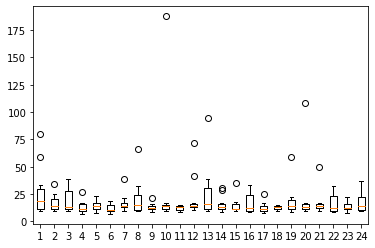

In [18]:
plt.boxplot(error)
plt.savefig('error_2.png')

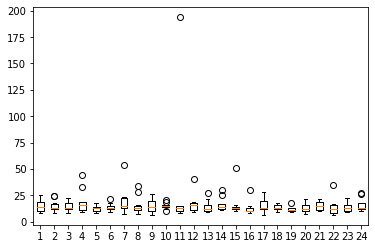

In [16]:
plt.boxplot(error)
plt.savefig('error_1.png')

In [20]:
# Try drop rows and columns with all 0s
pre = data.copy()
pre = pre.loc[(pre!=0).any(axis=1)]
pre = pre.loc[:, (pre != 0).any(axis=0)]

In [23]:
times = 11
num_comps = 25
x = pd.DataFrame(scale(pre),index = pre.index, columns = pre.columns)
error = pd.DataFrame(index = range(1,times), columns = range(1,num_comps))
# iterate over number of components
for num in range(1,num_comps):
    for time in range(1,times):
        # shuffle x
        x = x[np.random.permutation(x.columns)]
        x = x.reindex(np.random.permutation(x.index))
        # Since it is (23684,52), submatrix size is chosen as (100,5)
        # leave out submatrix
        A = x.values[:20,:5]
        B = x.values[:20,5:]
        C = x.values[20:,:5]
        D = x.values[20:,5:]
        # perform PCA
        pca = PCA(n_components = num)
        pca.fit(D)
        u = pca.components_.reshape([D.shape[1],-1])
        z = u.T.dot(D.T)
        D_approx = u.dot(z).reshape(D.shape)
        residule = np.dot( np.dot(B,np.linalg.pinv(D_approx)), C) - A
        error.loc[time][num] = sum(np.abs(residule)).sum()

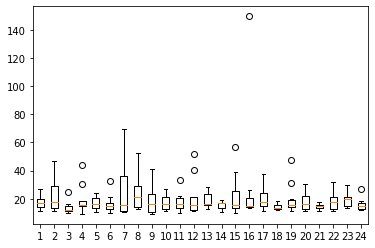

In [22]:
plt.boxplot(error)
plt.savefig('error_3.png')

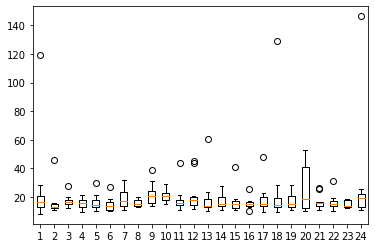

In [24]:
plt.boxplot(error)
plt.savefig('error_4.png')

### error 1&2 is performed before drop 0s.
### error 5&6 is performed with high iteration.

In [27]:
times = 26
num_comps = 25
x = pd.DataFrame(scale(pre),index = pre.index, columns = pre.columns)
error = pd.DataFrame(index = range(1,times), columns = range(1,num_comps))
# iterate over number of components
for num in range(1,num_comps):
    for time in range(1,times):
        # shuffle x
        x = x[np.random.permutation(x.columns)]
        x = x.reindex(np.random.permutation(x.index))
        # Since it is (23684,52), submatrix size is chosen as (100,5)
        # leave out submatrix
        A = x.values[:20,:5]
        B = x.values[:20,5:]
        C = x.values[20:,:5]
        D = x.values[20:,5:]
        # perform PCA
        pca = PCA(n_components = num)
        pca.fit(D)
        u = pca.components_.reshape([D.shape[1],-1])
        z = u.T.dot(D.T)
        D_approx = u.dot(z).reshape(D.shape)
        residule = np.dot( np.dot(B,np.linalg.pinv(D_approx)), C) - A
        error.loc[time][num] = sum(np.abs(residule)).sum()

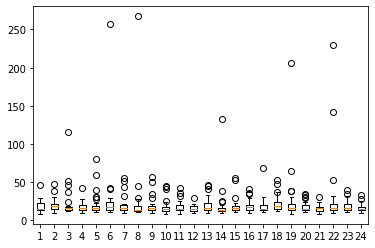

In [26]:
plt.boxplot(error)
plt.savefig('error_5.png')

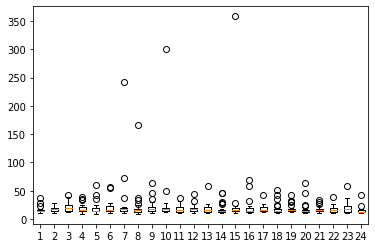

In [28]:
plt.boxplot(error)
plt.savefig('error_6.png')